__Change current directory__

In [1]:
import os
os.chdir('..')

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from timeit import default_timer
import pandas as pd
import seaborn as sns
from src import detector_descriptor as dd
from src import data as dt
from src import util
from src import experiments as ex
from src import imgop as ip
import yaml
# plt.style.use('fast')

In [3]:
with open(os.path.join('./', 'config.yml'), 'r') as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
    cfg = cfg['default']

In [4]:
dataset_path = cfg['path']['dataset']
dataset = cfg['current_dataset']
# labels = dt.load_labels(os.path.join(dataset_path, dataset), '.txt')
pckl_path = cfg['path']['pckl']
# pckl_name = ''.join([dataset, '_label.pckl'])
data_path = os.path.join(pckl_path, ''.join([dataset, '.pckl']))

In [5]:
linestyle_ = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
colors = ['olive', 'green', 'red', 'cyan', 'blue', 'purple', 'green', 'grey', 'orange', 'indigo']
markers = ['+', '^', 'o', 's', 'p', '*', 'x', '+', '^', 'o', 's', 'p', '*', 'x']
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"

AKAZE
leuven_img1
1504
leuven_img2
1100
leuven_img3
888
leuven_img4
723
leuven_img5
578
leuven_img6
431


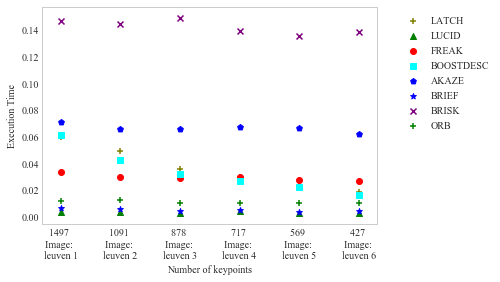

In [6]:
fig, ax = plt.subplots(1,1)
image_set = util.get_image_set(data_path, 'leuven')

ex.exp_desc_et_plt(image_set, 'AKAZE', ax)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
ax.set_xlabel("Number of keypoints")
ax.set_ylabel("Execution Time")
plt.grid()
plt.show()

GFTT
bikes_img1
1000
bikes_img2
1000
bikes_img3
1000
bikes_img4
1000
bikes_img5
1000
bikes_img6
1000


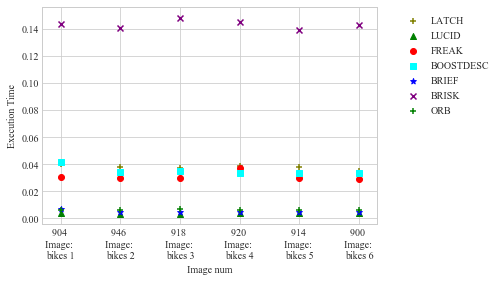

In [7]:
image_set = util.get_image_set(data_path, 'bikes')
fig, ax = plt.subplots(1,1)

ex.exp_desc_et_plt(image_set, 'GFTT', ax)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
ax.set_xlabel("Image num")
ax.set_ylabel("Execution Time")
plt.show()


AGAST
bikes_img1
11964
bikes_img2
3407
bikes_img3
2220
bikes_img4
1115
bikes_img5
693
bikes_img6
381
KAZE
bikes_img1
1808
bikes_img2
1360
bikes_img3
1252
bikes_img4
928
bikes_img5
740
bikes_img6
552
AKAZE
bikes_img1
1498
bikes_img2
1233
bikes_img3
1161
bikes_img4
970
bikes_img5
816
bikes_img6
629
FAST
bikes_img1
11379
bikes_img2
3144
bikes_img3
2045
bikes_img4
1039
bikes_img5
608
bikes_img6
314
BRISK
bikes_img1
3674
bikes_img2
1438
bikes_img3
926
bikes_img4
561
bikes_img5
402
bikes_img6
277
ORB
bikes_img1
11471
bikes_img2
5063
bikes_img3
3823
bikes_img4
2196
bikes_img5
1516
bikes_img6
989
GFTT
bikes_img1
1000
bikes_img2
1000
bikes_img3
1000
bikes_img4
1000
bikes_img5
1000
bikes_img6
1000
HarrisLaplace
bikes_img1
1044
bikes_img2
478
bikes_img3
500
bikes_img4
376
bikes_img5
301
bikes_img6
215
StarDetector
bikes_img1
557
bikes_img2
329
bikes_img3
261
bikes_img4
175
bikes_img5
128
bikes_img6
78


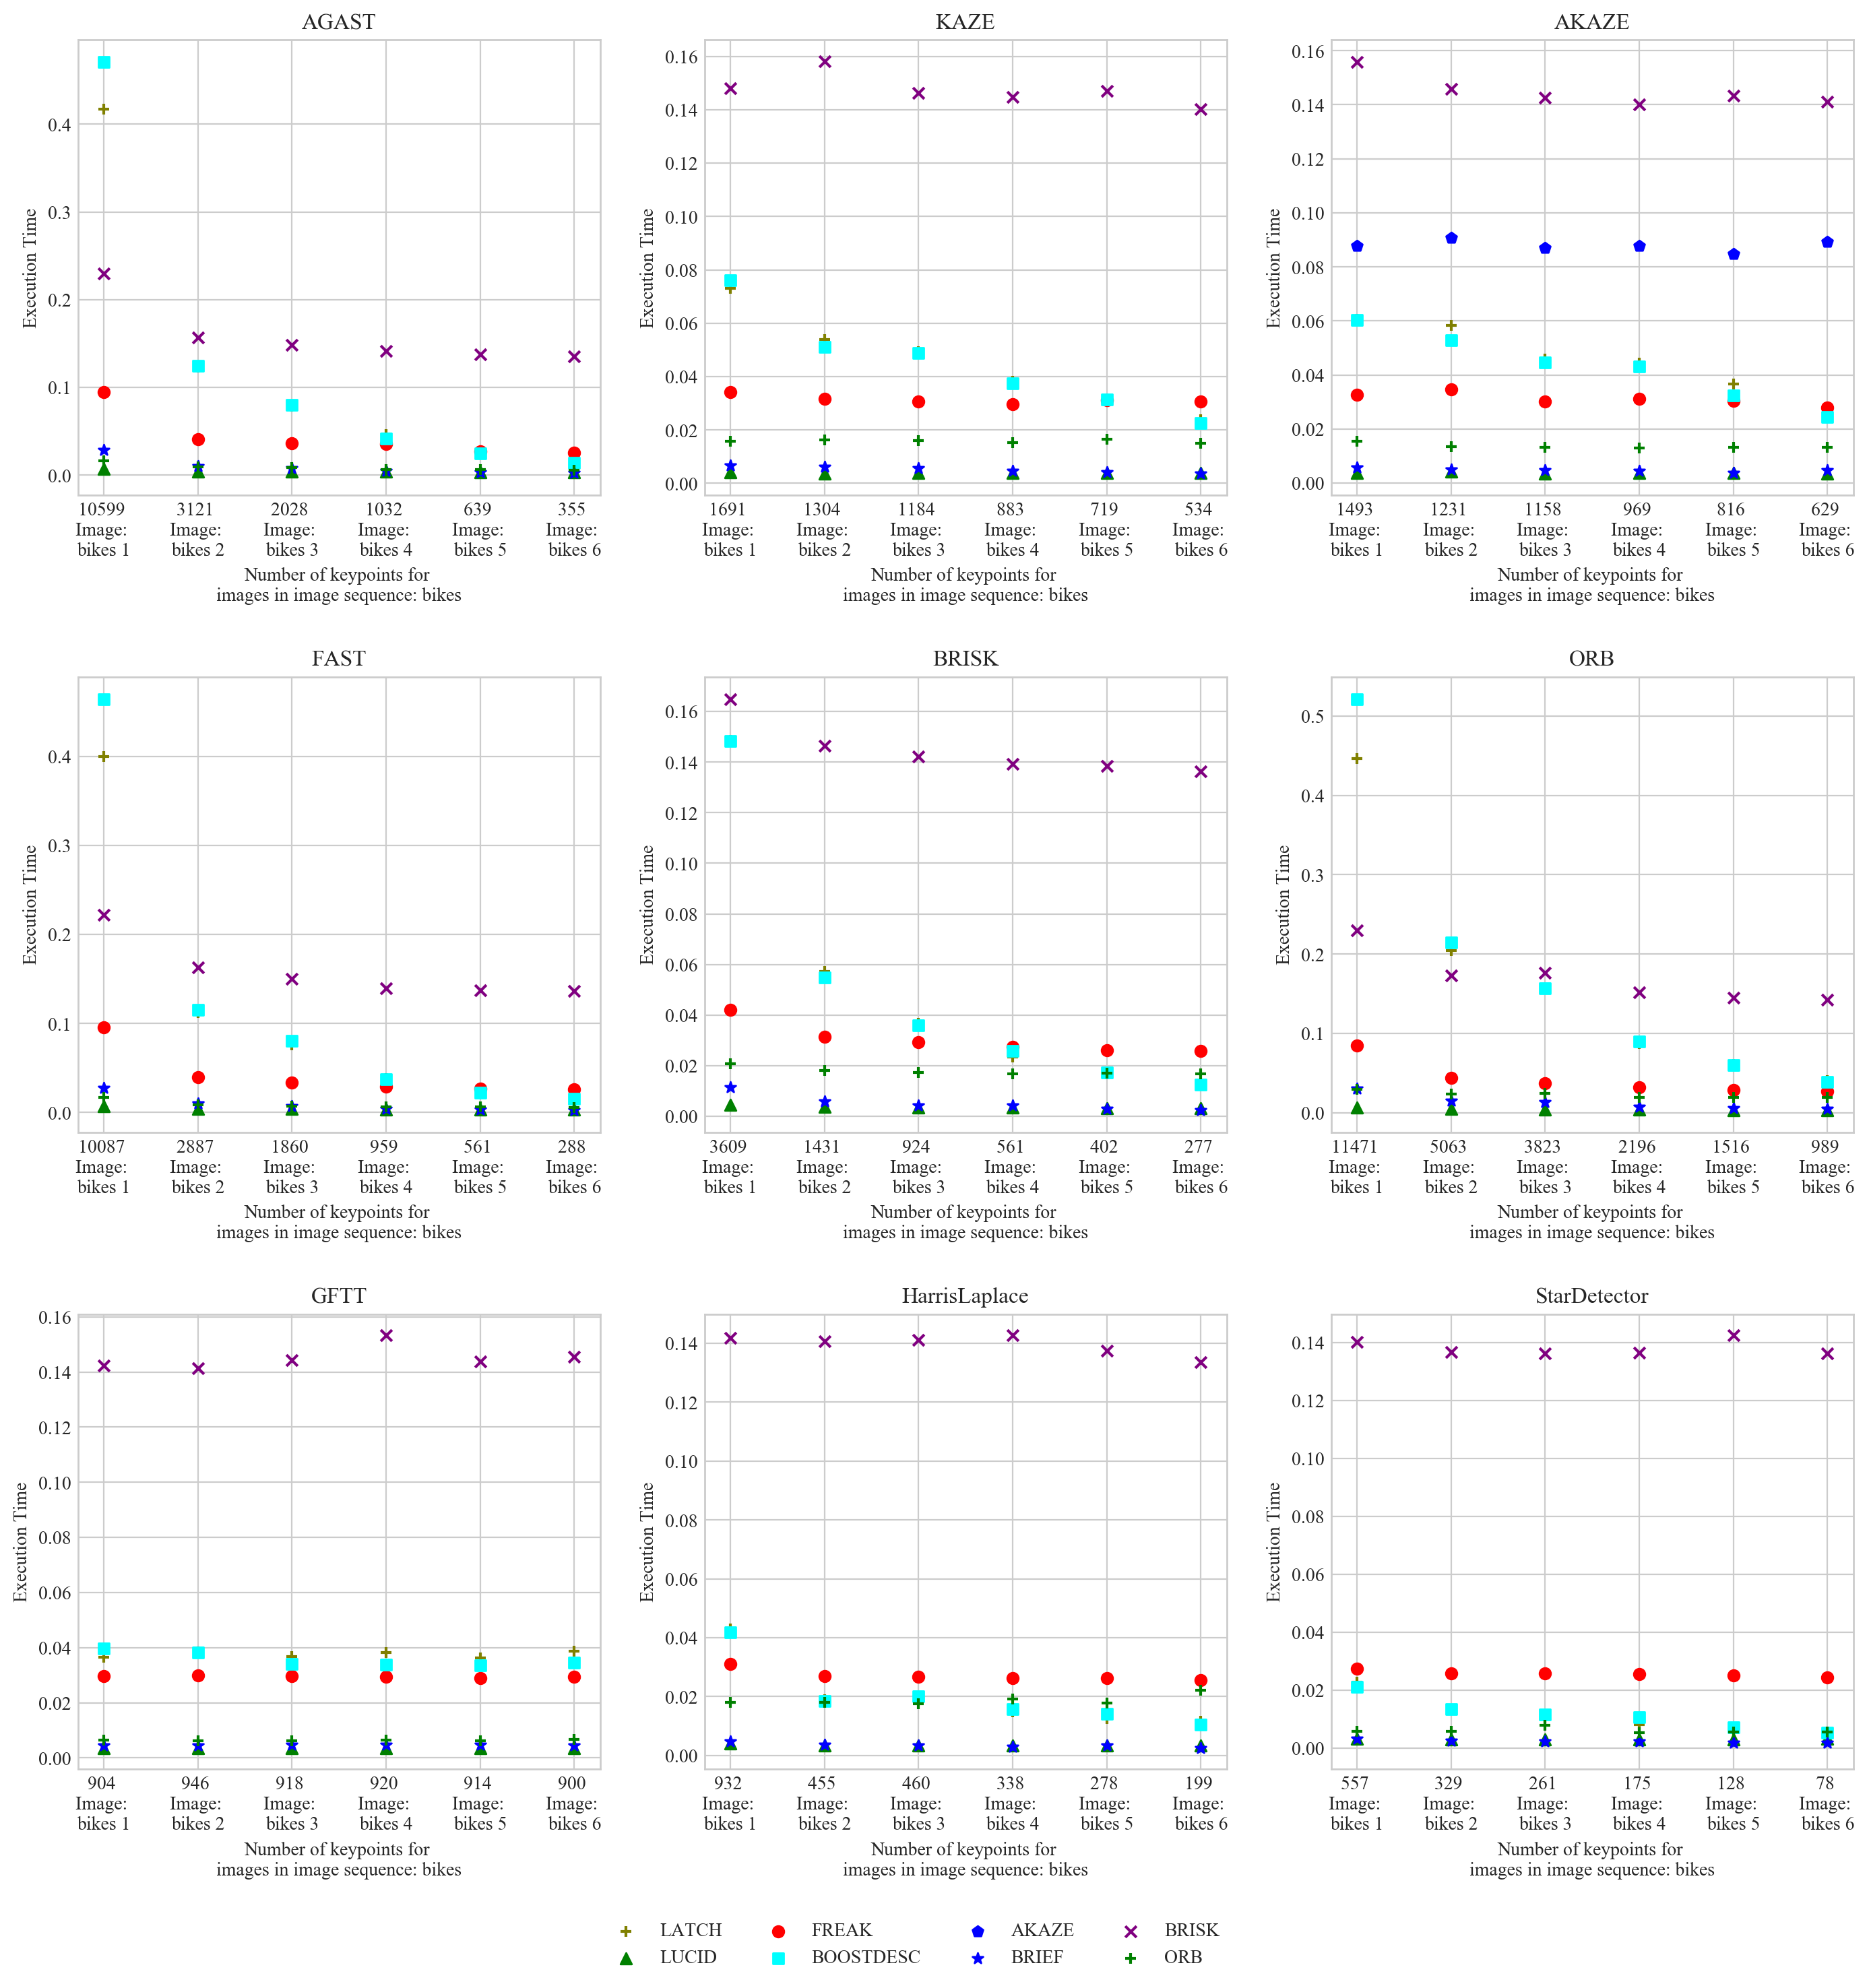

In [8]:
image_sequence_name = 'bikes'
image_set = util.get_image_set(data_path, image_sequence_name)
fig, axs = plt.subplots(3,3, figsize=(17,17), dpi=200)
legend_i = 0
for i in range(len(dd.all_detectors)):
#     print(type(axs[i]))
    detector_name = dd.all_detectors[i]
    if detector_name is 'AKAZE':
        legend_i = i
    ex.exp_desc_et_plt(image_set, detector_name, axs[i//3, i%3])
    
#     axs[i//3, i%3].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
    axs[i//3, i%3].set_xlabel(f'Number of keypoints for \nimages in image sequence: {image_sequence_name}')
    axs[i//3, i%3].set_ylabel("Execution Time")
    axs[i//3, i%3].set_title(detector_name)
handles, labels = axs[legend_i//3, legend_i%3].get_legend_handles_labels()
# handles2, labels2 = axs2[0].get_legend_handles_labels()
plt.legend(handles, labels, loc="upper center",bbox_to_anchor=(-0.8, -0.3), ncol = 4)
fig.subplots_adjust(wspace = 0.2, hspace=0.4)
plt.show()
# plt.show()


In [9]:
# image_sequence_name = 'leuven'
# image_set = util.get_image_set(data_path, image_sequence_name)
# fig, axs = plt.subplots(3,3, figsize=(17,17), dpi=200)
# legend_i = 0
# for i in range(len(dd.all_detectors)):
# #     print(type(axs[i]))
#     detector_name = dd.all_detectors[i]
#     if detector_name is 'AKAZE':
#         legend_i = i
#     ex.exp_desc_et_plt(image_set, detector_name, axs[i//3, i%3])
    
# #     axs[i//3, i%3].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
#     axs[i//3, i%3].set_xlabel(f'Number of keypoints for \nimages in image sequence: {image_sequence_name}')
#     axs[i//3, i%3].set_ylabel("Execution Time")
#     axs[i//3, i%3].set_title(detector_name)
# handles, labels = axs[legend_i//3, legend_i%3].get_legend_handles_labels()
# # handles2, labels2 = axs2[0].get_legend_handles_labels()
# plt.legend(handles, labels, loc="upper center",bbox_to_anchor=(-0.8, -0.3), ncol = 4)
# fig.subplots_adjust(wspace = 0.2, hspace=0.4)
# plt.show()

In [10]:
image_sequence_name = 'bikes'
image_set = util.get_image_set(data_path, image_sequence_name)
image = image_set['bikes_img1']
kp = ip.get_kp(image, 'KAZE')
len(kp)

1808

In [11]:
print(dd.all_descriptors)

['LATCH', 'LUCID', 'FREAK', 'BOOSTDESC', 'AKAZE', 'BRIEF', 'BRISK', 'ORB']


#### Default Size of the Descriptors
- LATCH: 32
- LUCID: 27
- FREAK: 64
- BOOSTDESC: 32
- AKAZE: 61
- BRIEF: 32
- BRISK: 64
- ORB: 32

